It's just a memo for me. Most of the content is just a copy & paste from Wikipedia.

In [7]:
run(`gist -u 324f8b8bbb971d3911fd884b40ddd9f4 18_05_27_logistc_regression.ipynb`)

https://gist.github.com/324f8b8bbb971d3911fd884b40ddd9f4


http://nbviewer.jupyter.org/gist/KeitaW/324f8b8bbb971d3911fd884b40ddd9f4

Derivation of the gradient of logistic regression for cross entropy loss-case.

A logistic function is a common "S" shape (sigmoid curve), with equation:
$$
h_{\mathbf{w}}(\mathbf{x}) = g(\mathbf{w}^T\mathbf{x}) = \frac{1}{1+\exp{(-\mathbf{w}^T\mathbf{x}})}, \quad g(z) = \frac{1}{1+\exp{(-z)}}
$$

In [2]:
using Plots
logistic(x) = 1/(1+exp(-x));

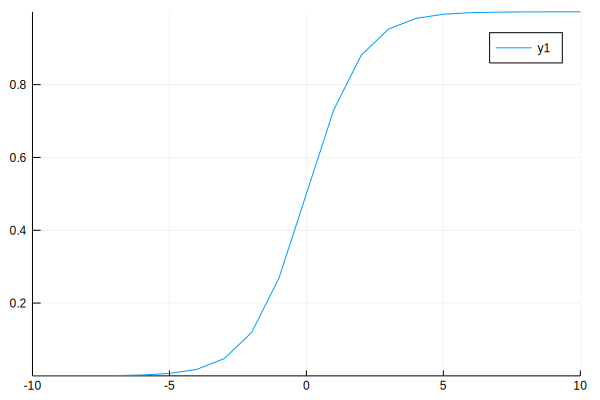

In [3]:
xs = -10:1:10
plot(xs, logistic.(xs))

The logistic function has an easily calculated derivative:
$$
\frac{d}{dx} g(x) = \frac{d}{dx} \frac{1}{1+\exp{(-x)}} \\
= \frac{d}{dx} \frac{\exp{(x)}}{+\exp{(x)}} \\
= g(x)(1-g(x))
$$
The derivative of the logistic function is an even function:
namely,$ g'(x) = g'(-x)$

# Cross entropy

REF: https://en.wikipedia.org/wiki/Cross_entropy

> In information theory, the cross entropy between two probability distributions $p$ and $q$ over the same underlying set of events measures the average number of bits needed to identify an event drawn from the  set, if a coding scheme is used that is optimized for an "unnatural probability distribution $q$ rather than the "true" distribution $p$.

$$
H(p, q) = E_p[-\log q] = -\int p(x) \log{q(x)} dx = -\int p(x) \log{p(x)} dx + \int p(x)\log{\frac{p(x)}{q(x)}} dx \\
= H(p) + D_{\mathrm{KL}}(p||q)
$$

> Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability 0.12 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

### Cross Entropy loss for 2-class classification.

> Cross entropy can be used to define the loss function in machine learning and optimization. The true probability $p_{i}$ is the true label, and the given distribution $q_{i}$ is the predicted value of the current model.
More specifically, let us consider logistic regression, which (in its most basic form) deals with classifying a given set of data points into two possible classes generically labelled $0$ and $1$. The logistic regression model thus predicts an output $y\in \{0,1\}$, given an input vector $\mathbf{x}$. The probability is modeled using the logistic function $g(z)=1/(1+e^{{-z}})$. Namely, the probability of finding the output $y=1$ is given by

$$
q_{y=1} = \hat{y} = g(\mathbf{w}\cdot \mathbf{x}) = 1/(1+e^{-\mathbf{w}\cdot \mathbf{x}}),
$$

where the vector of weights $\mathbf {w}$ is optimized through some appropriate algorithm such as gradient descent. Similarly, the complementary probability of finding the output $y=0$ is simply given by

$$q_{{y=0}}\ =\ 1-{\hat  {y}}$$
The true (observed) probabilities can be expressed similarly as $p_{{y=1}}=y$ and $p_{{y=0}}=1-y.$

Having set up our notation, $p\in \{y,1-y\}$ and $q\in \{{\hat  {y}},1-{\hat  {y}}\}$, we can use cross entropy to get a measure of dissimilarity between $p$ and $q$:
$$
H(p,q)\ =\ -\sum _{i}p_{i}\log q_{i}\ =\ -y\log {\hat  {y}}-(1-y)\log(1-{\hat  {y}})
$$
The typical cost function that one uses in logistic regression is computed by taking the average of all cross-entropies in the sample. For example, suppose we have $N$ samples with each sample labeled by $n=1,\dots ,N$. The loss function is then given by:

$$
\begin{aligned}J(\mathbf {w} )\ &=\ {\frac {1}{N}}\sum _{n=1}^{N}H(p_{n},q_{n})\ =\ -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {\hat {y}}_{n}+(1-y_{n})\log(1-{\hat {y}}_{n}){\bigg ]} \\
&= -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {g(\mathbf{w}\cdot\mathbf{x}_{n})}+(1-y_{n})\log(1-{g(\mathbf{w}\cdot\mathbf{x}_{n})}){\bigg ]}
\end{aligned}
$$

where ${\displaystyle {\hat {y}}_{n}\equiv g(\mathbf {w} \cdot \mathbf {x} _{n})=1/(1+e^{-\mathbf {w} \cdot \mathbf {x} _{n}})},$ with ${\displaystyle g(z)}$ the logistic function as before.

The logistic loss is sometimes called cross-entropy loss. It is also known as log loss (In this case, the binary label is often denoted by {-1,+1}).

We can minimize $J(\mathbf{w})$ by using its gradient,
$$
\nabla J(\mathbf{w}) = -\frac{1}{N} \sum_{n=1}^N [(y_n - g(\mathbf{w}\cdot \mathbf{x}_n))\mathbf{x}_n]
$$

where $\eta$ is a learning rate. 